# Lab05 Python Data Science with Pandas

In [3]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [4]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [15]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[['city','country']]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [12]:
# Q2: how to get the first 5 rows of the "city" column?
df['city'].head(5)

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [10]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2:2]

,lat,lon,date,city,country
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom


In [21]:
# Q4: how to use .loc to select the first row in "country" column?
df['country'].loc[:0]

0    United Kingdom
Name: country, dtype: object

In [22]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df[['city','date']].loc[:3]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [104]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[[3],[2]]

,date
3,05/14/2014 18:25


In [26]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[0: :300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [27]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [41]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['Munich_or_not']=df['city']=='Munich'

,lat,lon,date,city,country,Munich_or_not
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,False
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal,False
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal,False
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal,False
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal,False
...,...,...,...,...,...,...
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey,False
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey,False
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey,False
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey,False


In [49]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
Q10 = df[(df['country']=='Spain')&( df['city']!='Barcelona')]
Q10.head()

,lat,lon,date,city,country,Munich_or_not
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain,False
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain,False
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain,False
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain,False
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain,False


In [54]:
# Q11: select rows where either the city is munich, or the country is serbia
df[(df['city']=='Munich') | (df['country']=='Serbia')]

,lat,lon,date,city,country,Munich_or_not
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia,False
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia,False
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


In [64]:
# Q12: how many observations are west of the prime meridian?
len(df[df['lon']<0])

24

In [70]:
# Q13: get all rows that contain a city that starts with the letter G
df.loc[df['city'].str.startswith('G')]

,lat,lon,date,city,country,Munich_or_not
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland,False
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany,False
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany,False
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania,False


In [76]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
len(df.city.unique())

91

In [77]:
len(df.country.unique())

15

In [79]:
df.isnull().sum()
#no missing values in this dataframe

lat              0
lon              0
date             0
city             0
country          0
Munich_or_not    0
dtype: int64

In [96]:
# Q15: group by country name and show the city names in each of the country
df.groupby('country')[['country','city']].head()

,country,city
0,United Kingdom,West Drayton
1,Portugal,Lisbon
2,Portugal,Lisbon
3,Portugal,Lisbon
4,Portugal,Lisbon
5,Portugal,Lisbon
24,Spain,El Prat de Llobregat
25,Spain,Viladecans
26,Spain,Barcelona
27,Spain,Barcelona


## Part 3 <br /> How to select based on a date-time values

In [103]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [108]:
len(dt)

1759

In [112]:
# Q16: is the timestamp index unique? How can you use code to find it? 
print(len(dt.index.unique()))
print('1759!=1758, not unique')

1758
1759!=1758, not unique


In [128]:
# Q17: drop duplicate index 
dt.index.drop_duplicates()

DatetimeIndex(['2014-05-14 09:07:00', '2014-05-14 09:22:00',
               '2014-05-14 10:51:00', '2014-05-14 11:24:00',
               '2014-05-14 11:38:00', '2014-05-14 12:23:00',
               '2014-05-14 12:38:00', '2014-05-14 15:11:00',
               '2014-05-14 15:25:00', '2014-05-14 15:41:00',
               ...
               '2014-07-09 06:03:00', '2014-07-09 06:18:00',
               '2014-07-09 09:03:00', '2014-07-09 09:18:00',
               '2014-07-09 13:11:00', '2014-07-09 13:13:00',
               '2014-07-09 13:14:00', '2014-07-09 13:17:00',
               '2014-07-09 13:18:00', '2014-07-09 13:20:00'],
              dtype='datetime64[ns]', name='date', length=1758, freq=None)

In [125]:
# Q18: create a weekday and a weekend dataframe
# the .weekday attribute determines which day of the week a date is
# 0 is sunday and 6 is saturday, M-F are 1-5
dt['weekday']=dt.index.weekday
weekday = dt[np.logical_and(dt['weekday'] > 0, dt['weekday'] < 6)]
weekday

,lat,lon,city,country,weekday
date,,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom,2
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom,2
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom,2
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom,2
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom,2
...,...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany,2
2014-07-09 13:14:00,48.356529,11.792183,Munich,Germany,2
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany,2


In [124]:
weekend = dt[np.logical_or(dt['weekday'] == 0, dt['weekday'] == 6)]
weekend

,lat,lon,city,country,weekday
date,,,,,
2014-05-18 00:28:00,41.145255,-8.610369,Porto,Portugal,6
2014-05-18 00:58:00,41.145189,-8.610365,Porto,Portugal,6
2014-05-18 01:28:00,41.145240,-8.610390,Porto,Portugal,6
2014-05-18 01:58:00,41.145200,-8.610370,Porto,Portugal,6
2014-05-18 02:12:00,41.145240,-8.610390,Porto,Portugal,6
...,...,...,...,...,...
2014-07-07 21:00:00,41.043501,28.985467,Istanbul,Turkey,0
2014-07-07 21:15:00,41.043456,28.985431,Istanbul,Turkey,0
2014-07-07 21:30:00,41.043465,28.985440,Istanbul,Turkey,0


<AxesSubplot:title={'center':'Number of Observations grouped by Weekday'}>

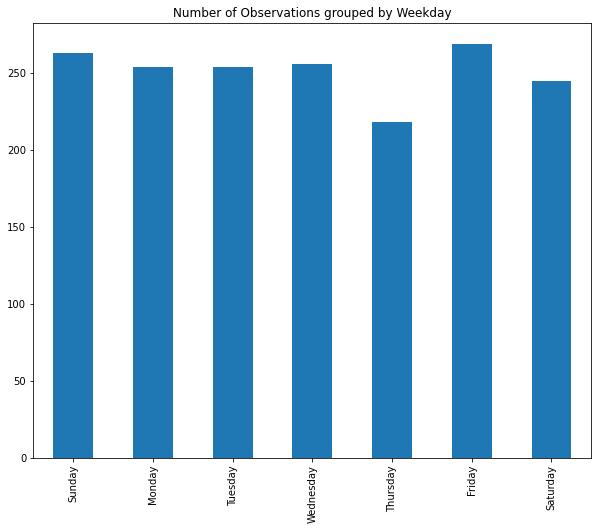

In [130]:
# Q19: calculate and plot the number of observations each day of the week has
dt.groupby('weekday', as_index = False).count()
daily = dt.groupby(dt.index.weekday).size()
daily.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily.plot(figsize=(10, 8), kind = 'bar', title = 'Number of Observations grouped by Weekday')